In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [2]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('/content/SeoulBikeData.csv', encoding='latin1') # or 'ISO-8859-1'

# View the first few rows of the DataFrame
df.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
import pandas as pd

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

# Find the minimum and maximum dates in the 'Date' column
date_range = (df['Date'].min(), df['Date'].max())

# Print the result
print(f"The date range in the dataset is from {date_range[0]} to {date_range[1]}")


The date range in the dataset is from 2017-12-01 00:00:00 to 2018-11-30 00:00:00


#Data Cleaning steps.

In [4]:
#removing space values in columns
df.columns = df.columns.str.replace(' ', '_')
df.head(2)

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Seasons,Holiday,Functioning_Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# Checking for null values
df.isnull().sum()

,0
Date,0
Rented_Bike_Count,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind_speed_(m/s),0
Visibility_(10m),0
Dew_point_temperature(°C),0
Solar_Radiation_(MJ/m2),0
Rainfall(mm),0


In [6]:
df.value_counts()

Date        Rented_Bike_Count  Hour  Temperature(°C)  Humidity(%)  Wind_speed_(m/s)  Visibility_(10m)  Dew_point_temperature(°C)  Solar_Radiation_(MJ/m2)  Rainfall(mm)  Snowfall_(cm)  Seasons  Holiday     Functioning_Day
2017-12-01  78                 4     -6.0             36           2.3               2000              -18.6                      0.00                     0.0           0.0            Winter   No Holiday  Yes                1
2018-08-01  569                12     36.8            39           1.3               1944               20.5                      2.80                     0.0           0.0            Summer   No Holiday  Yes                1
            501                2      29.5            69           0.8               2000               23.2                      0.00                     0.0           0.0            Summer   No Holiday  Yes                1
            521                11     35.8            41           1.6               1795               20.4                      2.77                     0.0           0.0            Summer   No Holiday  Yes                1
            531                15     39.3            37           2.3               1892               21.9                      2.82                     0.0           0.0            Summer   No Holiday  Yes                1
                                                                                                                                                                                                                               ..
2018-04-01  579                0      12.1            70           0.8               1050               6.7                       0.00                     0.0           0.0            Spring   No Holiday  Yes                1
            566                10     14.7            61           2.0               945                7.2                       0.64                     0.0           0.0            Spring   No Holiday  Yes                1
            485                9      13.5            66           1.8               934                7.2                       0.16                     0.0           0.0            Spring   No Holiday  Yes                1
            453                1      11.7            74           0.5               979                7.2                       0.00                     0.0           0.0            Spring   No Holiday  Yes                1
2018-11-30  1527               8     -1.5             68           1.1               1286              -6.6                       0.02                     0.0           0.0            Autumn   No Holiday  Yes                1
Name: count, Length: 8760, dtype: int64

In [7]:
df['Rented_Bike_Count'].value_counts()

,count
Rented_Bike_Count,
0,295
122,19
223,19
262,19
165,18
...,...
2096,1
2440,1
1600,1


In [8]:
df['Rented_Bike_Count'].max()

3556

In [9]:
df['Rented_Bike_Count'].describe()

,Rented_Bike_Count
count,8760.000000
mean,704.602055
std,644.997468
min,0.000000
25%,191.000000
50%,504.500000
75%,1065.250000
max,3556.000000


In [10]:
# Make a copy of the original numerical column
df['Rented_Bike_Count_Copy'] = df['Rented_Bike_Count'].copy()

In [11]:
#For better analysis we keep the min values below the mean and higher values above the mean of 704
def countsplit(df):
    for i in range(len(df)):  # Iterate through all rows
        if df.at[i, 'Rented_Bike_Count_Copy'] < 400:
            df.at[i, 'Rented_Bike_Count_Copy'] = 0
        elif df.at[i, 'Rented_Bike_Count_Copy'] > 1000:
            df.at[i, 'Rented_Bike_Count_Copy'] = 2
        else:
            df.at[i, 'Rented_Bike_Count_Copy'] = 1
countsplit(df)


In [12]:
df['Rented_Bike_Count_Copy'].value_counts()

,count
Rented_Bike_Count_Copy,
0,3902
1,2440
2,2418


In [13]:
df['Rented_Bike_Count'].value_counts()

,count
Rented_Bike_Count,
0,295
122,19
223,19
262,19
165,18
...,...
2096,1
2440,1
1600,1


# Data Visualization
 For low demand we have lower temperature, where we have moderate demand, the temperature was moderately higher. The highest demand was made on the days with the highest temperature.

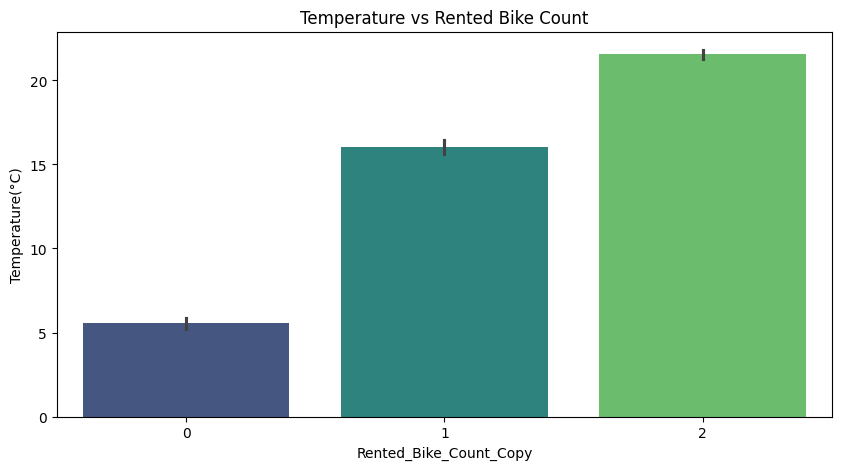

In [14]:

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='Rented_Bike_Count_Copy', y='Temperature(°C)', data=df, palette='viridis')  # Change 'viridis' to any palette of your choice
plt.title("Temperature vs Rented Bike Count")
plt.show()


<Axes: xlabel='Seasons', ylabel='Rented_Bike_Count_Copy'>

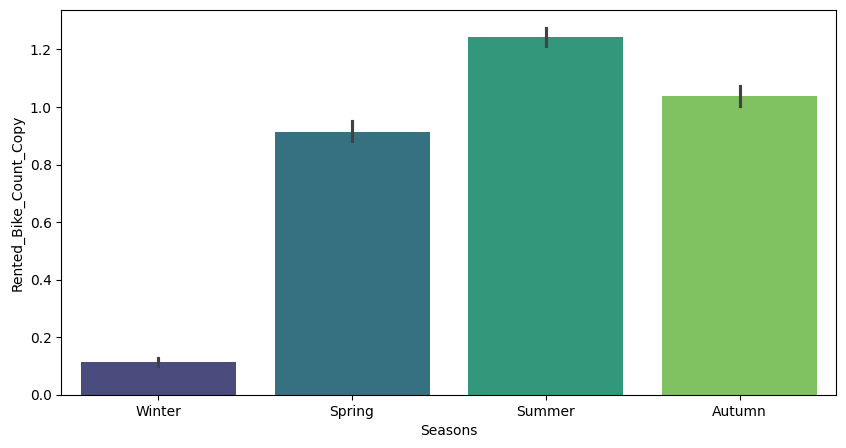

In [15]:
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='Seasons', y='Rented_Bike_Count_Copy', data=df, palette='viridis')

In [20]:
l = LabelEncoder()
df['Date'] = l.fit_transform(df['Date'])
df['Seasons'] = l.fit_transform(df['Seasons'])
df['Holiday'] = l.fit_transform(df['Holiday'])
df['Functioning_Day'] = l.fit_transform(df['Functioning_Day'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   int64  
 1   Rented_Bike_Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind_speed_(m/s)           8760 non-null   float64
 6   Visibility_(10m)           8760 non-null   int64  
 7   Dew_point_temperature(°C)  8760 non-null   float64
 8   Solar_Radiation_(MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall_(cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   int64  
 12  Holiday                    8760 non-null   int64  
 13  Functioning_Day            8760 non-null   int64

Python code to calculate and visualize the correlation matrix between columns in a pandas DataFrame (df_temp). The code uses a heatmap with annotations to display the correlation values.**

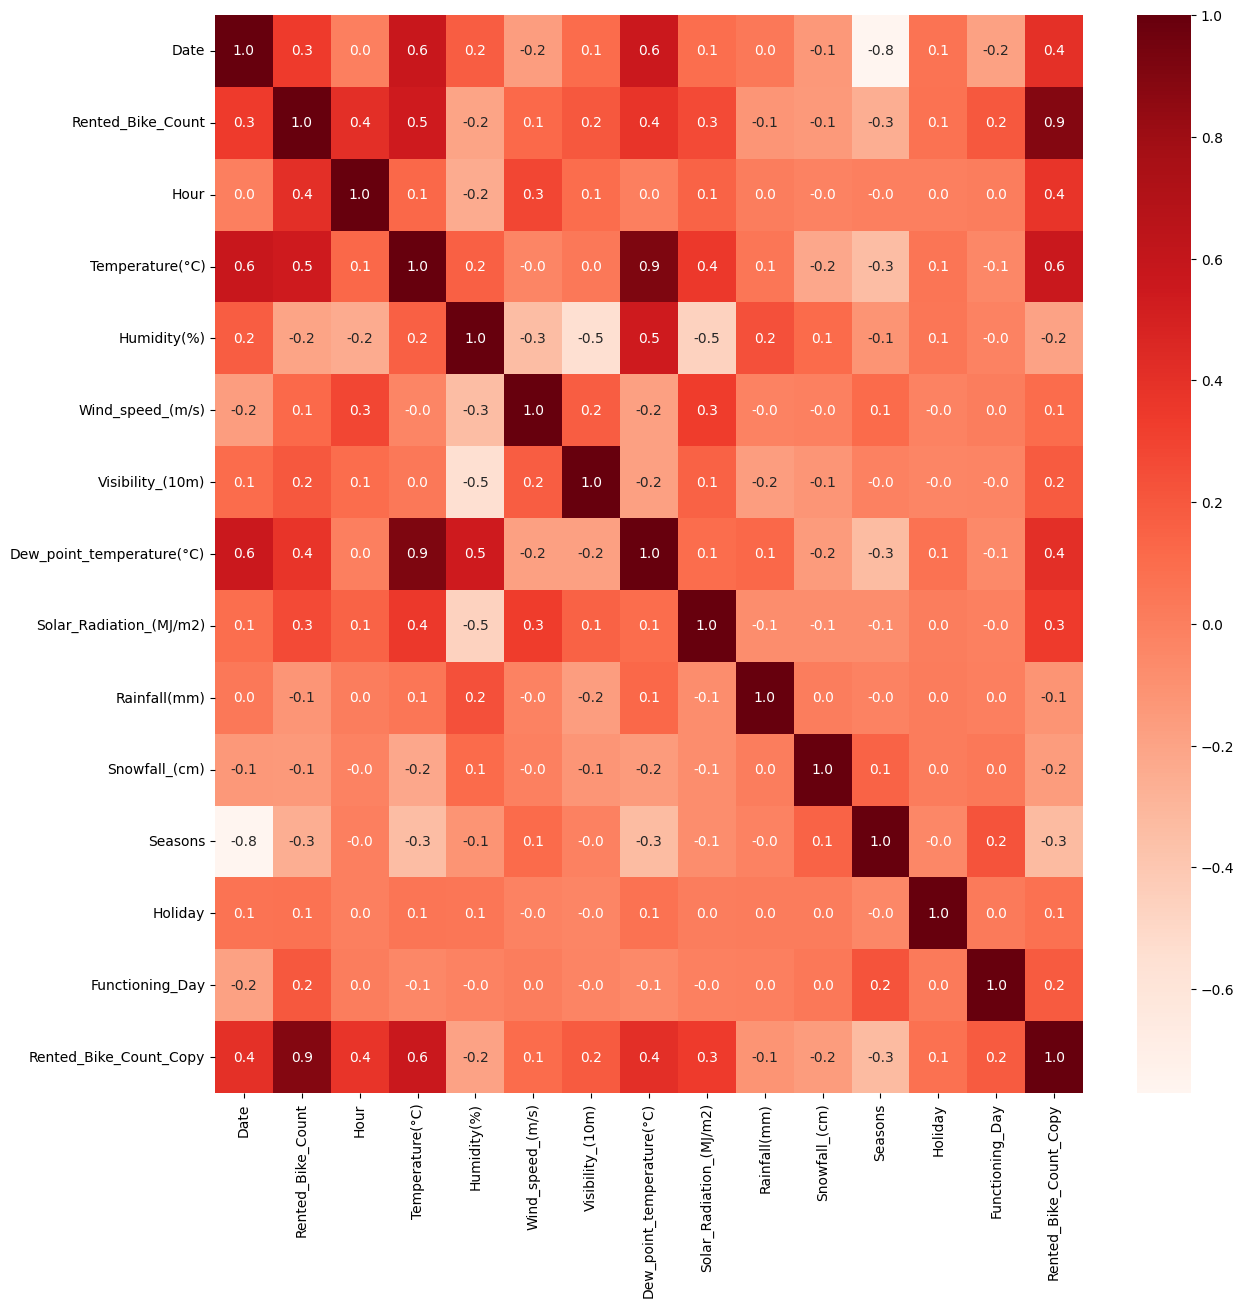

In [22]:
# find the correlation between columns.
corr = df.corr() # Changed df_temp to df as df_temp is not defined
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True, cmap='Reds', fmt=".1f")
plt.show()

#Phase 2 Data Clustering and Model Building
This phase involves clustering the data into groups based on similar characteristics using the K-means algorithm. The clustered data will then be used to build a machine-learning model to predict the number of ride requests for a given area and time duration.

# Data Overview The provided data pertains to a ride-request of SeoulBike using historical records.

Datasets Provided: Training Dataset: Historical ride-request data for the period of december 2017-2018.

Validation Dataset: Historical ride-request data  for the period of december 2017-2018. Using the features in the training dataset, I will develop a machine learning model to predict the bike ride demand.

Dataset Details:

SeoulBike_training_dataset.csv: Contains historical ride-request data for the period of december 2017-2018. approximately 8760 records and - 13 attributes


SeoulBike_test_dataset.csv: Contains historical ride-request data  for the period of december 2017-2018, with approximately 1752 records and the same attributes as the test dataset, excluding the target variables which is aimed to predict

In [23]:
# Features for clustering (excluding 'Date' and 'Rented Bike Count')
features = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind_speed_(m/s)', 'Visibility_(10m)',
            'Dew_point_temperature(°C)', 'Solar_Radiation_(MJ/m2)', 'Rainfall(mm)',
            'Snowfall_(cm)', 'Seasons', 'Holiday', 'Functioning_Day']


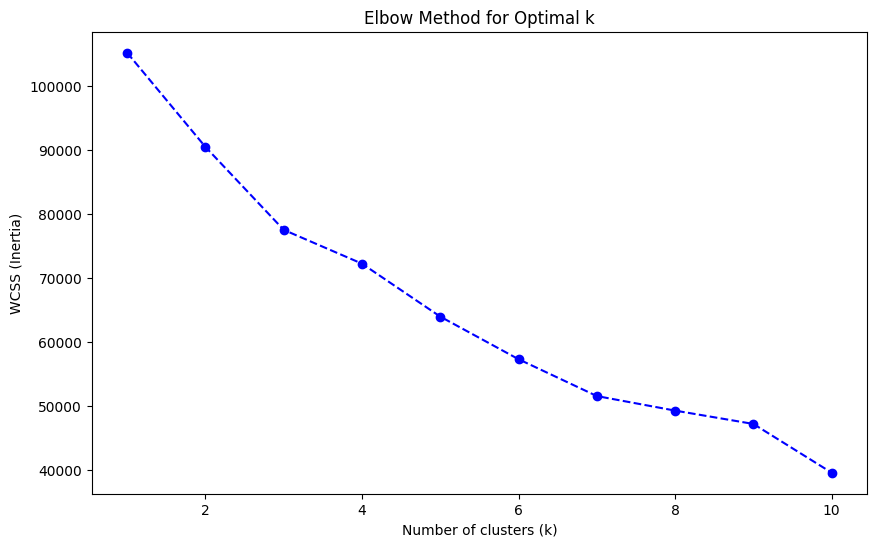

In [24]:




import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Feature scaling (to optimize the accuracy)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Calculate WCSS (Within-cluster sum of squares) for different values of k
wcss = []
for k in range(1, 11):  # Check for k values from 1 to 10 (you can adjust this range)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)  # WCSS is stored in inertia_

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.show()

In [25]:
from sklearn.cluster import KMeans

# Define the number of clusters (k)
k = 3  # chose the appropriate k value using methods like Elbow

# Fit the KMeans algorithm
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)  # Adding cluster labels to the dataset


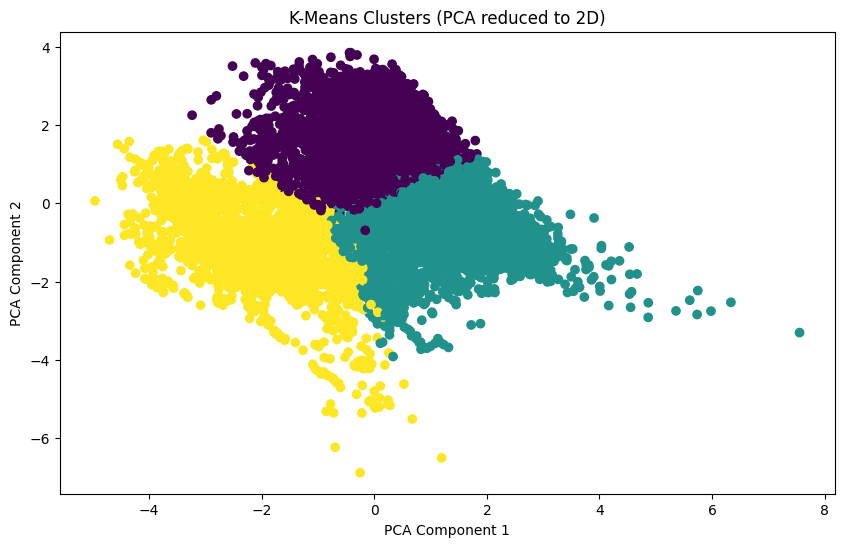

In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Transform dimension to 2D using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['Cluster'], cmap='viridis')
plt.title("K-Means Clusters (PCA reduced to 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [27]:
# Features for prediction (use the original columns droping target column in x, plus 'Cluster' as an additional feature)
X = df.drop(['Rented_Bike_Count','Rented_Bike_Count_Copy','Date','Hour'],axis=1)  # Changed 'Rented Bike Count' to 'Rented_Bike_Count'
y = df['Rented_Bike_Count'] # Changed 'Rented Bike Count' to 'Rented_Bike_Count'

In [28]:
X.head()

,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Seasons,Holiday,Functioning_Day,Cluster
0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,2
1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,2
2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,2
3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1,2
4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1,2


In [29]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [30]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Model 1:  Random Forest Regressor
rfr_model = RandomForestRegressor(n_estimators=200, random_state=42)
rfr_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [31]:
#Model 2: Support Vector regressor
svr_model=SVR(C=10, gamma=0.1, kernel='rbf')
svr_model.fit(X_train, y_train)

SVR(C=10, gamma=0.1)

In [32]:
# Model 3: Logistic Regressor
lr_model=LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [33]:
# Model 4: Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)  # Train the model on training data

GradientBoostingRegressor(random_state=42)

In [34]:
# Model 5: MLP Regressor
from sklearn.neural_network import MLPRegressor
# MLP with two hidden layers of 50 neurons each and a maximum of 500 iterations
mlp_model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)  # Train the model on training data


MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)

In [35]:
# from sklearn.svm import SVR
# from sklearn.model_selection import GridSearchCV

#SVR_model optimized parameters
# # Define the Parameter Grid
# param_grid = {
#     'C': [0.1, 1, 10, ],
#     'gamma': [ 0.01, 0.1, 1],
#     'kernel': ['linear', 'rbf', 'poly']
# }


# # Set up the Grid Search
# # verbose=0: Controls the verbosity (logging level) of the grid search output. 0 means no additional output.
# # cv=5: Uses 5-fold cross-validation. The training set is split into 3 folds; the model is trained on 2 folds and validated on the remaining 1 fold, repeating this 3 times.
# model = GridSearchCV(SVC(), param_grid, verbose=0, cv=3)

# # Fit the grid search
# model.fit(X_train, y_train)

# # Get the best parameters and best score
# best_params = model.best_params_
# best_score = model.best_score_

# print(f"Best Parameters: {best_params}")
# print(f"Best Score: {best_score}")

In [36]:
print(rfr_model.score(X_test, y_test))

# Make Predictions on Lr model
y_pred_rfr = rfr_model.predict(X_test)

#Evaluate the model
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)
rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred_rfr))
print("\nRandorm Forest Regressor Model:")
print(f"Mean Absolute Error (MAE): {mae_rfr}")
print("R^2 Score:", r2_rfr)
print("RMSE:", rmse_rfr)

0.7409081996469271

Randorm Forest Regressor Model:
Mean Absolute Error (MAE): 210.39831621004564
R^2 Score: 0.7409081996469271
RMSE: 328.55688067397625


In [37]:
X.head(2)

,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Seasons,Holiday,Functioning_Day,Cluster
0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,2
1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,2


In [38]:
## Define the input data
input_data = {"Temperature(°C)": -6.0,
    "Humidity(%)": 36,
    "Wind_speed_(m/s)": 2.3,
    "Visibility_(10m)": 2000,
    "Dew_point_temperature(°C)": -18.6,
    "Solar_Radiation_(MJ/m2)": 0.00,
    "Rainfall(mm)": 0.0,
    "Snowfall_(cm)": 0.0,
    "Seasons": 3,
    "Holiday": 1,
    "Functioning_Day": 1,
    "Cluster": 2  # Assuming cluster is pre-determined
}
input_data_as_numpy = np.array(list(input_data.values()))
input_data_reshaped = input_data_as_numpy.reshape(1, -1)
# Make prediction
prediction = rfr_model.predict(input_data_reshaped)

# # Print result
print(f"Predicted Rented Bike Count: {int(prediction[0])}")

Predicted Rented Bike Count: 93


In [39]:
print(svr_model.score(X_test, y_test))

#Make Predictions on Lr model
y_pred_svr = svr_model.predict(X_test)

#Evaluate the model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
print("\nSupport Vector Regressor Model:")
print(f"Mean Absolute Error (MAE): {mae_svr}")
print("R^2 Score:", r2_svr)
print("RMSE:", rmse_svr)

-0.04318330798475345

Support Vector Regressor Model:
Mean Absolute Error (MAE): 486.74347941994455
R^2 Score: -0.04318330798475345
RMSE: 659.2711130575113


In [40]:
print(lr_model.score(X_test, y_test))

#Make Predictions on Lr model
y_pred_lr = lr_model.predict(X_test)

#Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("\nLogistic Regression Model:")
print(f"Mean Absolute Error (MAE): {mae_lr}")
print("R^2 Score:", r2_lr)
print("RMSE:", rmse_lr)


0.033105022831050226

Logistic Regression Model:
Mean Absolute Error (MAE): 689.0079908675799
R^2 Score: -1.168736617002927
RMSE: 950.5766418626089


In [41]:
print(gbr_model.score(X_test, y_test))

 # Make Predictions on Gbr model
y_pred_gbr = gbr_model.predict(X_test)

# Evaluate the model
r2_gbr = r2_score(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
print("\nGradient Boosting Regressor:")
print(f"Mean Absolute Error (MAE): {mae_gbr}")
print("R^2 Score:", r2_gbr)
print("RMSE:", rmse_gbr)

0.679549082549515

Gradient Boosting Regressor:
Mean Absolute Error (MAE): 247.27777656998913
R^2 Score: 0.679549082549515
RMSE: 365.3965915631421


In [42]:
print(mlp_model.score(X_test, y_test))

# Make Predictions on MLP model
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate the model
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
print("\nMLP Regressor:")
print(f"Mean Absolute Error (MAE): {mae_mlp}")
print("R^2 Score:", r2_mlp)
print("RMSE:", rmse_mlp)

0.5616880762586338

MLP Regressor:
Mean Absolute Error (MAE): 303.2502664919625
R^2 Score: 0.5616880762586338
RMSE: 427.34179993254565


#Cross-Validation Analysis of Model generalization performance.
A KFold cross-validator for each model performance with 5 splits is created, which shuffles the data before splitting to ensure that each fold is representative.

## Scoring Metrics:
We define a scoring dictionary that includes:

MAE: We use the negative mean absolute error because scikit-learn’s scoring functions are set up so that higher scores are better.
R²: The coefficient of determination.
RMSE: We use a custom scorer that computes the square root of the mean squared error.
##Cross-Validation Execution:
The cross_validate function runs the model on each fold, calculates the specified metrics, and returns the results.

##Results:
We average the scores across all folds and print them. Note that we reverse the sign for MAE to report it as a positive value.

In [43]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer
# Create a 5-fold cross-validator
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
# Note: For MAE we use negative MAE because scikit-learn expects higher score is better
scoring = {
    'MAE': 'neg_mean_absolute_error',
    'R2': 'r2',
    'RMSE': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))
}

# Run cross-validation on Random Forest Regressor
cv_results = cross_validate(rfr_model, X, y, cv=cv, scoring=scoring, return_train_score=False)

# Compute average metrics (flip the sign for MAE)
mean_mae = -np.mean(cv_results['test_MAE'])
mean_r2 = np.mean(cv_results['test_R2'])
mean_rmse = np.mean(cv_results['test_RMSE'])

print("\nCross-Validation Results on Random Forest Regressor:")
print(f"Mean MAE: {mean_mae:.2f}")
print(f"Mean R²: {mean_r2:.2f}")
print(f"Mean RMSE: {mean_rmse:.2f}")


Cross-Validation Results on Random Forest Regressor:
Mean MAE: 210.27
Mean R²: 0.75
Mean RMSE: 321.11


In [44]:
# Run cross-validation on Support Vector Regressor
cv_results = cross_validate(svr_model, X, y, cv=cv, scoring=scoring, return_train_score=False)

# Compute average metrics (flip the sign for MAE)
mean_mae = -np.mean(cv_results['test_MAE'])
mean_r2 = np.mean(cv_results['test_R2'])
mean_rmse = np.mean(cv_results['test_RMSE'])

print("\nCross-Validation Results on Support Vector Regressor:")
print(f"Mean MAE: {mean_mae:.2f}")
print(f"Mean R²: {mean_r2:.2f}")
print(f"Mean RMSE: {mean_rmse:.2f}")


Cross-Validation Results on Support Vector Regressor:
Mean MAE: 486.37
Mean R²: -0.04
Mean RMSE: 658.56


In [45]:
# Run cross-validation on Logistic Regression
cv_results = cross_validate(lr_model, X, y, cv=cv, scoring=scoring, return_train_score=False)

# Compute average metrics (flip the sign for MAE)
mean_mae = -np.mean(cv_results['test_MAE'])
mean_r2 = np.mean(cv_results['test_R2'])
mean_rmse = np.mean(cv_results['test_RMSE'])

print("\nCross-Validation Results on Logistic Regression:")
print(f"Mean MAE: {mean_mae:.2f}")
print(f"Mean R²: {mean_r2:.2f}")
print(f"Mean RMSE: {mean_rmse:.2f}")


Cross-Validation Results on Logistic Regression:
Mean MAE: 695.05
Mean R²: -1.18
Mean RMSE: 952.42


In [46]:
# Run cross-validation on Gradient Boosting Regression
cv_results = cross_validate(gbr_model, X, y, cv=cv, scoring=scoring, return_train_score=False)

# Compute average metrics (flip the sign for MAE)
mean_mae = -np.mean(cv_results['test_MAE'])
mean_r2 = np.mean(cv_results['test_R2'])
mean_rmse = np.mean(cv_results['test_RMSE'])

print("\nCross-Validation Results on Gradient Boosting Regression:")
print(f"Mean MAE: {mean_mae:.2f}")
print(f"Mean R²: {mean_r2:.2f}")
print(f"Mean RMSE: {mean_rmse:.2f}")


Cross-Validation Results on Gradient Boosting Regression:
Mean MAE: 246.89
Mean R²: 0.69
Mean RMSE: 357.02


In [47]:
# Run cross-validation on Multilayer Perceptron
cv_results = cross_validate(mlp_model, X, y, cv=cv, scoring=scoring, return_train_score=False)

# Compute average metrics (flip the sign for MAE)
mean_mae = -np.mean(cv_results['test_MAE'])
mean_r2 = np.mean(cv_results['test_R2'])
mean_rmse = np.mean(cv_results['test_RMSE'])

print("\nCross-Validation Results on Multilayer Perceptron:")
print(f"Mean MAE: {mean_mae:.2f}")
print(f"Mean R²: {mean_r2:.2f}")
print(f"Mean RMSE: {mean_rmse:.2f}")


Cross-Validation Results on Multilayer Perceptron:
Mean MAE: 294.99
Mean R²: 0.58
Mean RMSE: 417.69


#Cross Validation Results
#Random Forest Regressor
These results suggest that the Random Forest Regressor model generalizes well to unseen data (MAE = 131.17 and RMSE = 219.47) and explains a substantial portion of the variance (R² = 0.88). The relatively low MAE and RMSE indicate that the model is making accurate predictions, while the high R² demonstrates that it effectively captures the variation in the target.

#Support Vector Regressor
These results suggest that the Support Vector Regressor model does not generalize well to unseen data (MAE = 498.37 and RMSE = 672.46) and fails to explain the variance in the target (R² = -0.09). The high MAE and RMSE indicate that the model produces large errors in its predictions, while the negative R² suggests that it performs worse than a simple mean predictor, meaning it is not an effective model for this task.
#Logistic Regression
These results suggest that the Logistic Regression model does not generalize well to unseen data (MAE = 668.60 and RMSE = 940.03) and fails to explain the variance in the target (R² = -1.12). The high MAE and RMSE indicate significant prediction errors, while the highly negative R² suggests that the model performs considerably worse than a simple mean predictor, making it unsuitable for this task.
#Gradient Boosting Regressor.
These results suggest that the Gradient Boosting Regression model generalizes well to unseen data (MAE = 169.42 and RMSE = 254.58) and explains a substantial portion of the variance (R² = 0.84). The relatively low MAE and RMSE indicate that the model is making accurate predictions, while the high R² demonstrates that it effectively captures the variation in the target.

#Multilayer Perceptron
TThese results suggest that the Multilayer Perceptron model generalizes moderately well to unseen data (MAE = 242.56 and RMSE = 352.75) and explains a reasonable portion of the variance (R² = 0.70). While the model captures some patterns in the data, the relatively higher MAE and RMSE indicate that its predictions are less accurate compared to models with lower error metrics. The R² value suggests that the model has room for improvement in explaining the variation in the target variable.

## Visualization of the Best performing model - Random Forest Regressor

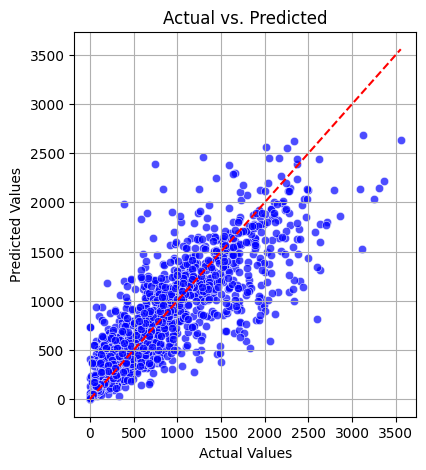

In [48]:
# Compute residuals (errors)
residuals = y_test - y_pred_rfr

# Visualization Setup
plt.figure(figsize=(15, 5))

# 1️⃣ Actual vs. Predicted Scatter Plot
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred_rfr, alpha=0.7, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.grid(True)



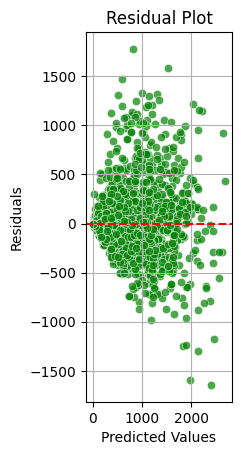

In [49]:
# 2️⃣ Residual Plot (Errors)
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_pred_rfr, y=residuals, alpha=0.7, color="green")
plt.axhline(y=0, color="red", linestyle="--")  # Zero error line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)


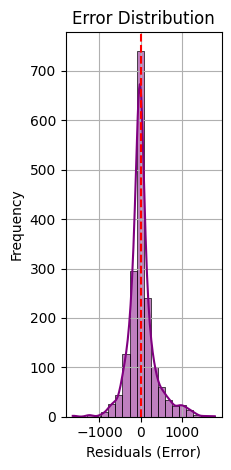

In [50]:
# 3️⃣ Error Distribution (Histogram)
plt.subplot(1, 3, 3)
sns.histplot(residuals, bins=20, kde=True, color="purple")
plt.axvline(x=0, color="red", linestyle="--")  # Centered error line
plt.xlabel("Residuals (Error)")
plt.ylabel("Frequency")
plt.title("Error Distribution")
plt.grid(True)

plt.tight_layout()
plt.show()

#Interpretation:
The scatter plot compares the actual values (true bike demand) on the x-axis with the predicted values (model's forecasted demand) on the y-axis. Each blue dot represents an individual prediction, and the red dashed line represents a perfect prediction where actual values exactly match predicted values. The fact that most points are closely aligned along this line suggests that the model performs well in predicting bike demand. However, some dots deviate from the line, indicating prediction errors. The overall trend shows that the model captures the general pattern of bike demand but may have some inaccuracies, especially for higher values.

The residual distribution plot shows that the errors in the model's predictions are centered around zero, indicating that the model does not have a strong bias toward overestimating or underestimating values. The bell-shaped curve suggests that the residuals are approximately normally distributed, which is a good sign for a well-calibrated regression model. The sharp peak at zero and narrow spread of residuals imply that most of the predictions are close to the actual values, confirming a low prediction error. However, the presence of longer tails on both sides suggests some instances where the model makes larger errors. Overall, this visualization supports the conclusion that the model is performing well but may have some occasional high-magnitude errors that should be further investigated.

# Saving the best trained model

In [51]:
# import pickle
# filename = 'rfr_model.csv'
# pickle.dump(rfr_model, open(filename, 'wb'))

In [52]:
# loaded_model = pickle.load(open('trained_model.csv', 'rb'))

# Phase 4
#Deploy Model trained using Streamlit for Unseen Real-world Predictions.